In [120]:
import numpy as np
from numpy import linalg as la
import pandas as pd
from scipy.stats import *
from scipy.linalg import block_diag

import matplotlib.pyplot as plt

In [145]:
def nearestPD(A):
    """Find the nearest positive-definite matrix to input

    A Python/Numpy port of John D'Errico's `nearestSPD` MATLAB code [1], which
    credits [2].

    [1] https://www.mathworks.com/matlabcentral/fileexchange/42885-nearestspd

    [2] N.J. Higham, "Computing a nearest symmetric positive semidefinite
    matrix" (1988): https://doi.org/10.1016/0024-3795(88)90223-6
    """

    B = (A + A.T) / 2
    _, s, V = la.svd(B)

    H = np.dot(V.T, np.dot(np.diag(s), V))

    A2 = (B + H) / 2

    A3 = (A2 + A2.T) / 2

    if isPD(A3):
        return A3

    spacing = np.spacing(la.norm(A))
    # The above is different from [1]. It appears that MATLAB's `chol` Cholesky
    # decomposition will accept matrixes with exactly 0-eigenvalue, whereas
    # Numpy's will not. So where [1] uses `eps(mineig)` (where `eps` is Matlab
    # for `np.spacing`), we use the above definition. CAVEAT: our `spacing`
    # will be much larger than [1]'s `eps(mineig)`, since `mineig` is usually on
    # the order of 1e-16, and `eps(1e-16)` is on the order of 1e-34, whereas
    # `spacing` will, for Gaussian random matrixes of small dimension, be on
    # othe order of 1e-16. In practice, both ways converge, as the unit test
    # below suggests.
    
    I = np.eye(A.shape[0])
    k = 1
    while not isPD(A3):
        mineig = np.min(np.real(la.eigvals(A3)))
        A3 += I * (-mineig * k**2 + spacing)
        k += 1

    return A3


def isPD(B):
    """Returns true when input is positive-definite, via Cholesky"""
    try:
        _ = la.cholesky(B)
        return True
    except la.LinAlgError:
        return False


def make_block_covariance(n, n_eff, rho):
    assert(n>=n_eff)
    
    s = np.random.gamma(1, 1, n_eff)
    blocksize = int(np.floor(n/n_eff))
    blocks=[]
    
    for i in range(0,n_eff):
        block = np.ones((blocksize,blocksize))*rho
        np.fill_diagonal(block,s[i]*np.ones((block.shape[0],)))
        blocks.append(block)
        
    return nearestPD(block_diag(*blocks))
    
def correlated_null_samples(n_samples, covariance):
    m = np.zeros((covariance.shape[0],))    
    return np.random.multivariate_normal(m, covariance, n_samples).T
    

In [ ]:
np.one

In [59]:
np.floor(6/2)

3.0

In [ ]:
stats.ttest_ind(data_group1, data_group2, equal_var = False)

In [24]:
tmp=np.ones((2,2))
np.fill_diagonal(tmp,[2,3])
tmp

array([[2., 1.],
       [1., 3.]])

In [196]:
n=1000
n_eff=100
COV = make_block_covariance(n,n_eff,0.8)

In [199]:
cov = np.eye(COV.shape[0])

In [201]:
cov=COV

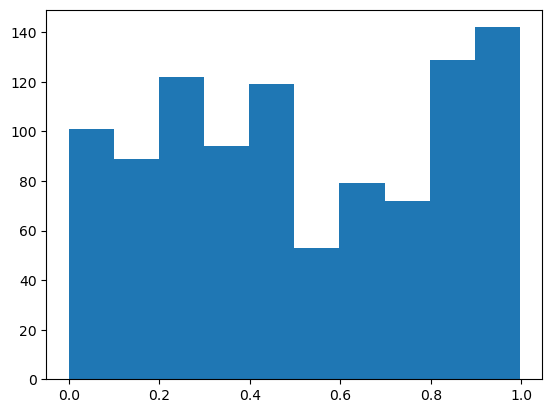

In [209]:
sample=correlated_null_samples(40,cov)
X = sample[:,:20]
Y = sample[:,20:]
pvalues=np.zeros((n,))
for i in range(n):
    test=ttest_ind(X[i,:], Y[i,:], equal_var = False)
    pvalues[i]=test.pvalue

plt.hist(pvalues)
plt.show()    